In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from catboost import CatBoostRegressor


%matplotlib inline

In [2]:
print("TensorFlow v" + tf.__version__)

TensorFlow v2.17.0


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
train = pd.read_csv('C:/Users/maksim/Downloads/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/maksim/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df = train

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\maksim\AppData\Local\Temp\ipykernel_15324\3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


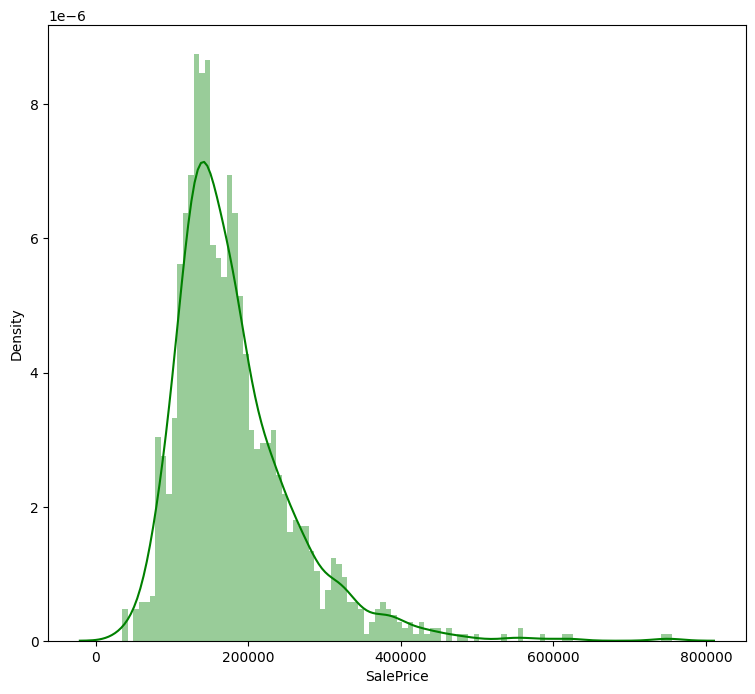

In [9]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [10]:
threshold = len(df) * 0.20
threshold

292.0

In [11]:
column = df.isna().sum() > threshold
cols_drop = df.columns[column]
train_temp_df = df.drop(cols_drop, axis=1)

In [12]:
print(df.shape)
print(train_temp_df.shape)

(1460, 81)
(1460, 75)


In [13]:
df = train_temp_df

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


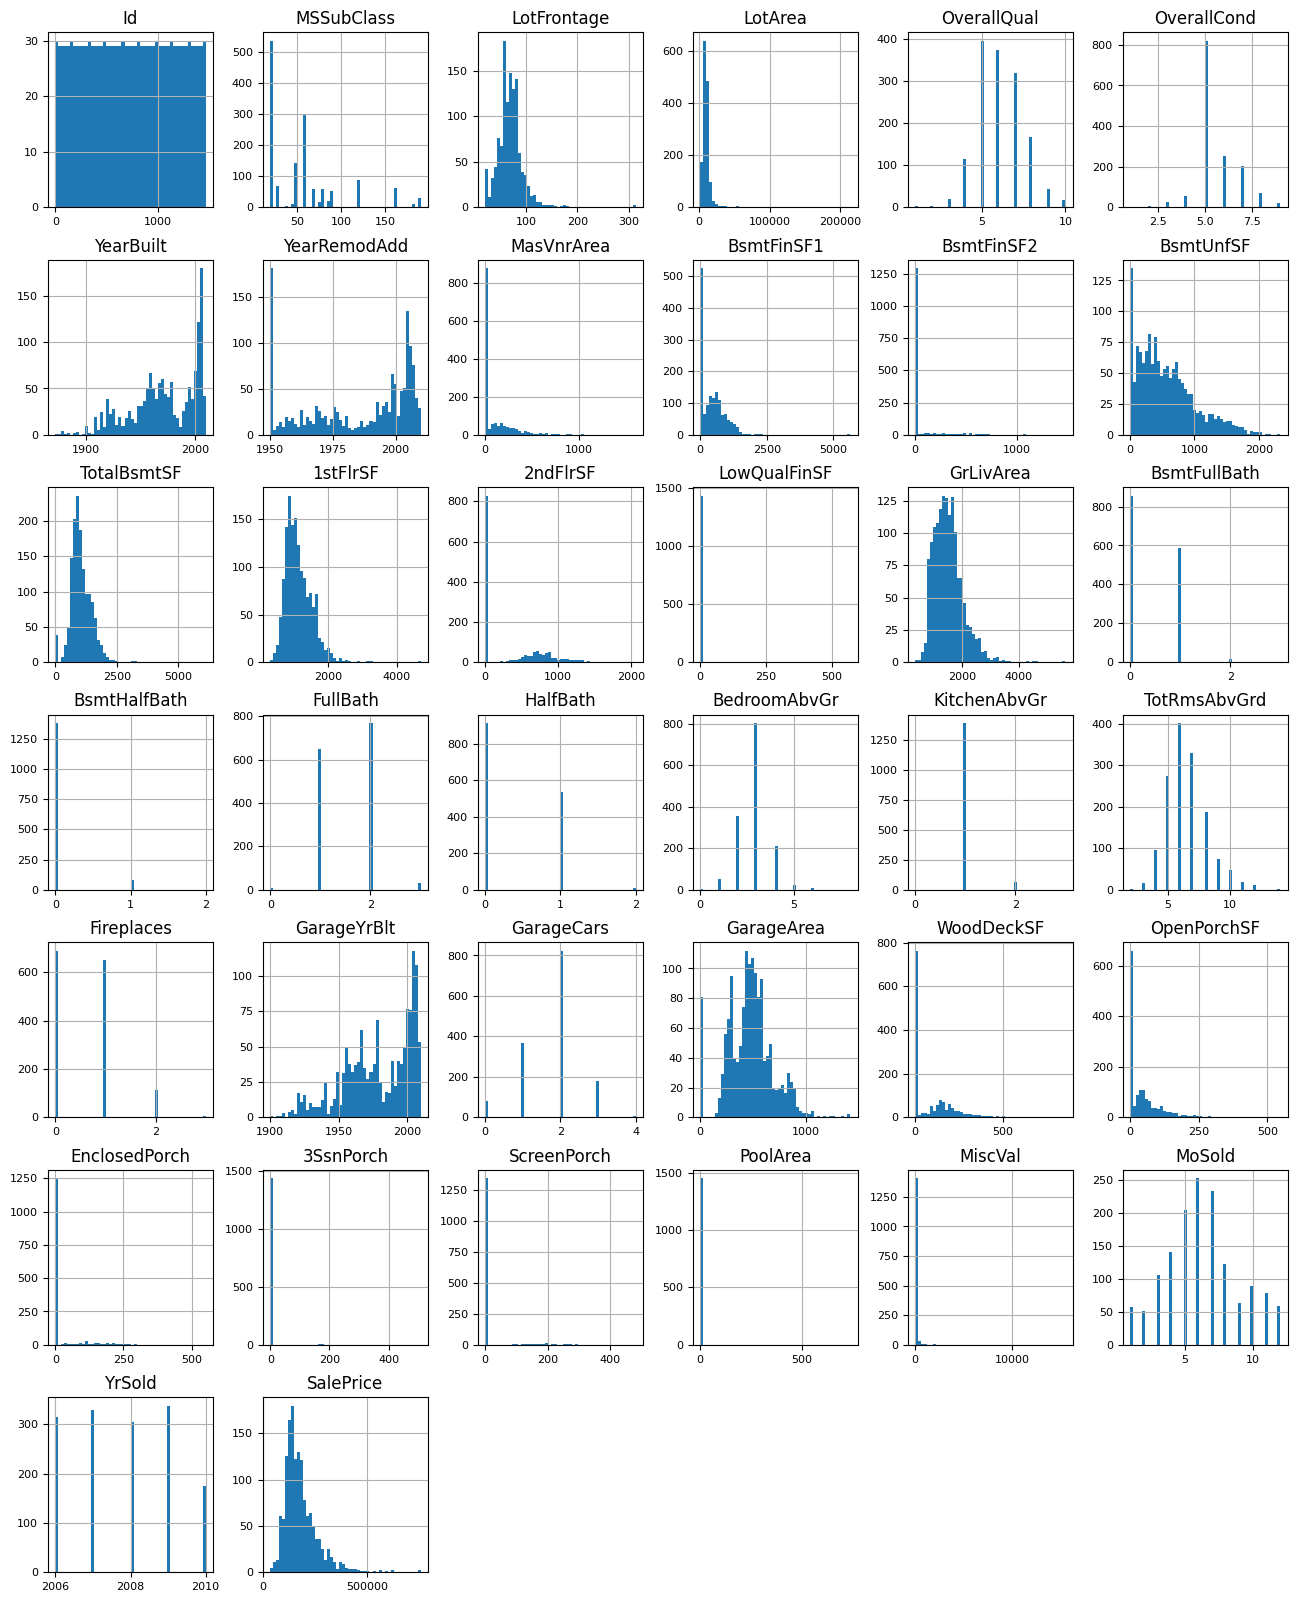

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

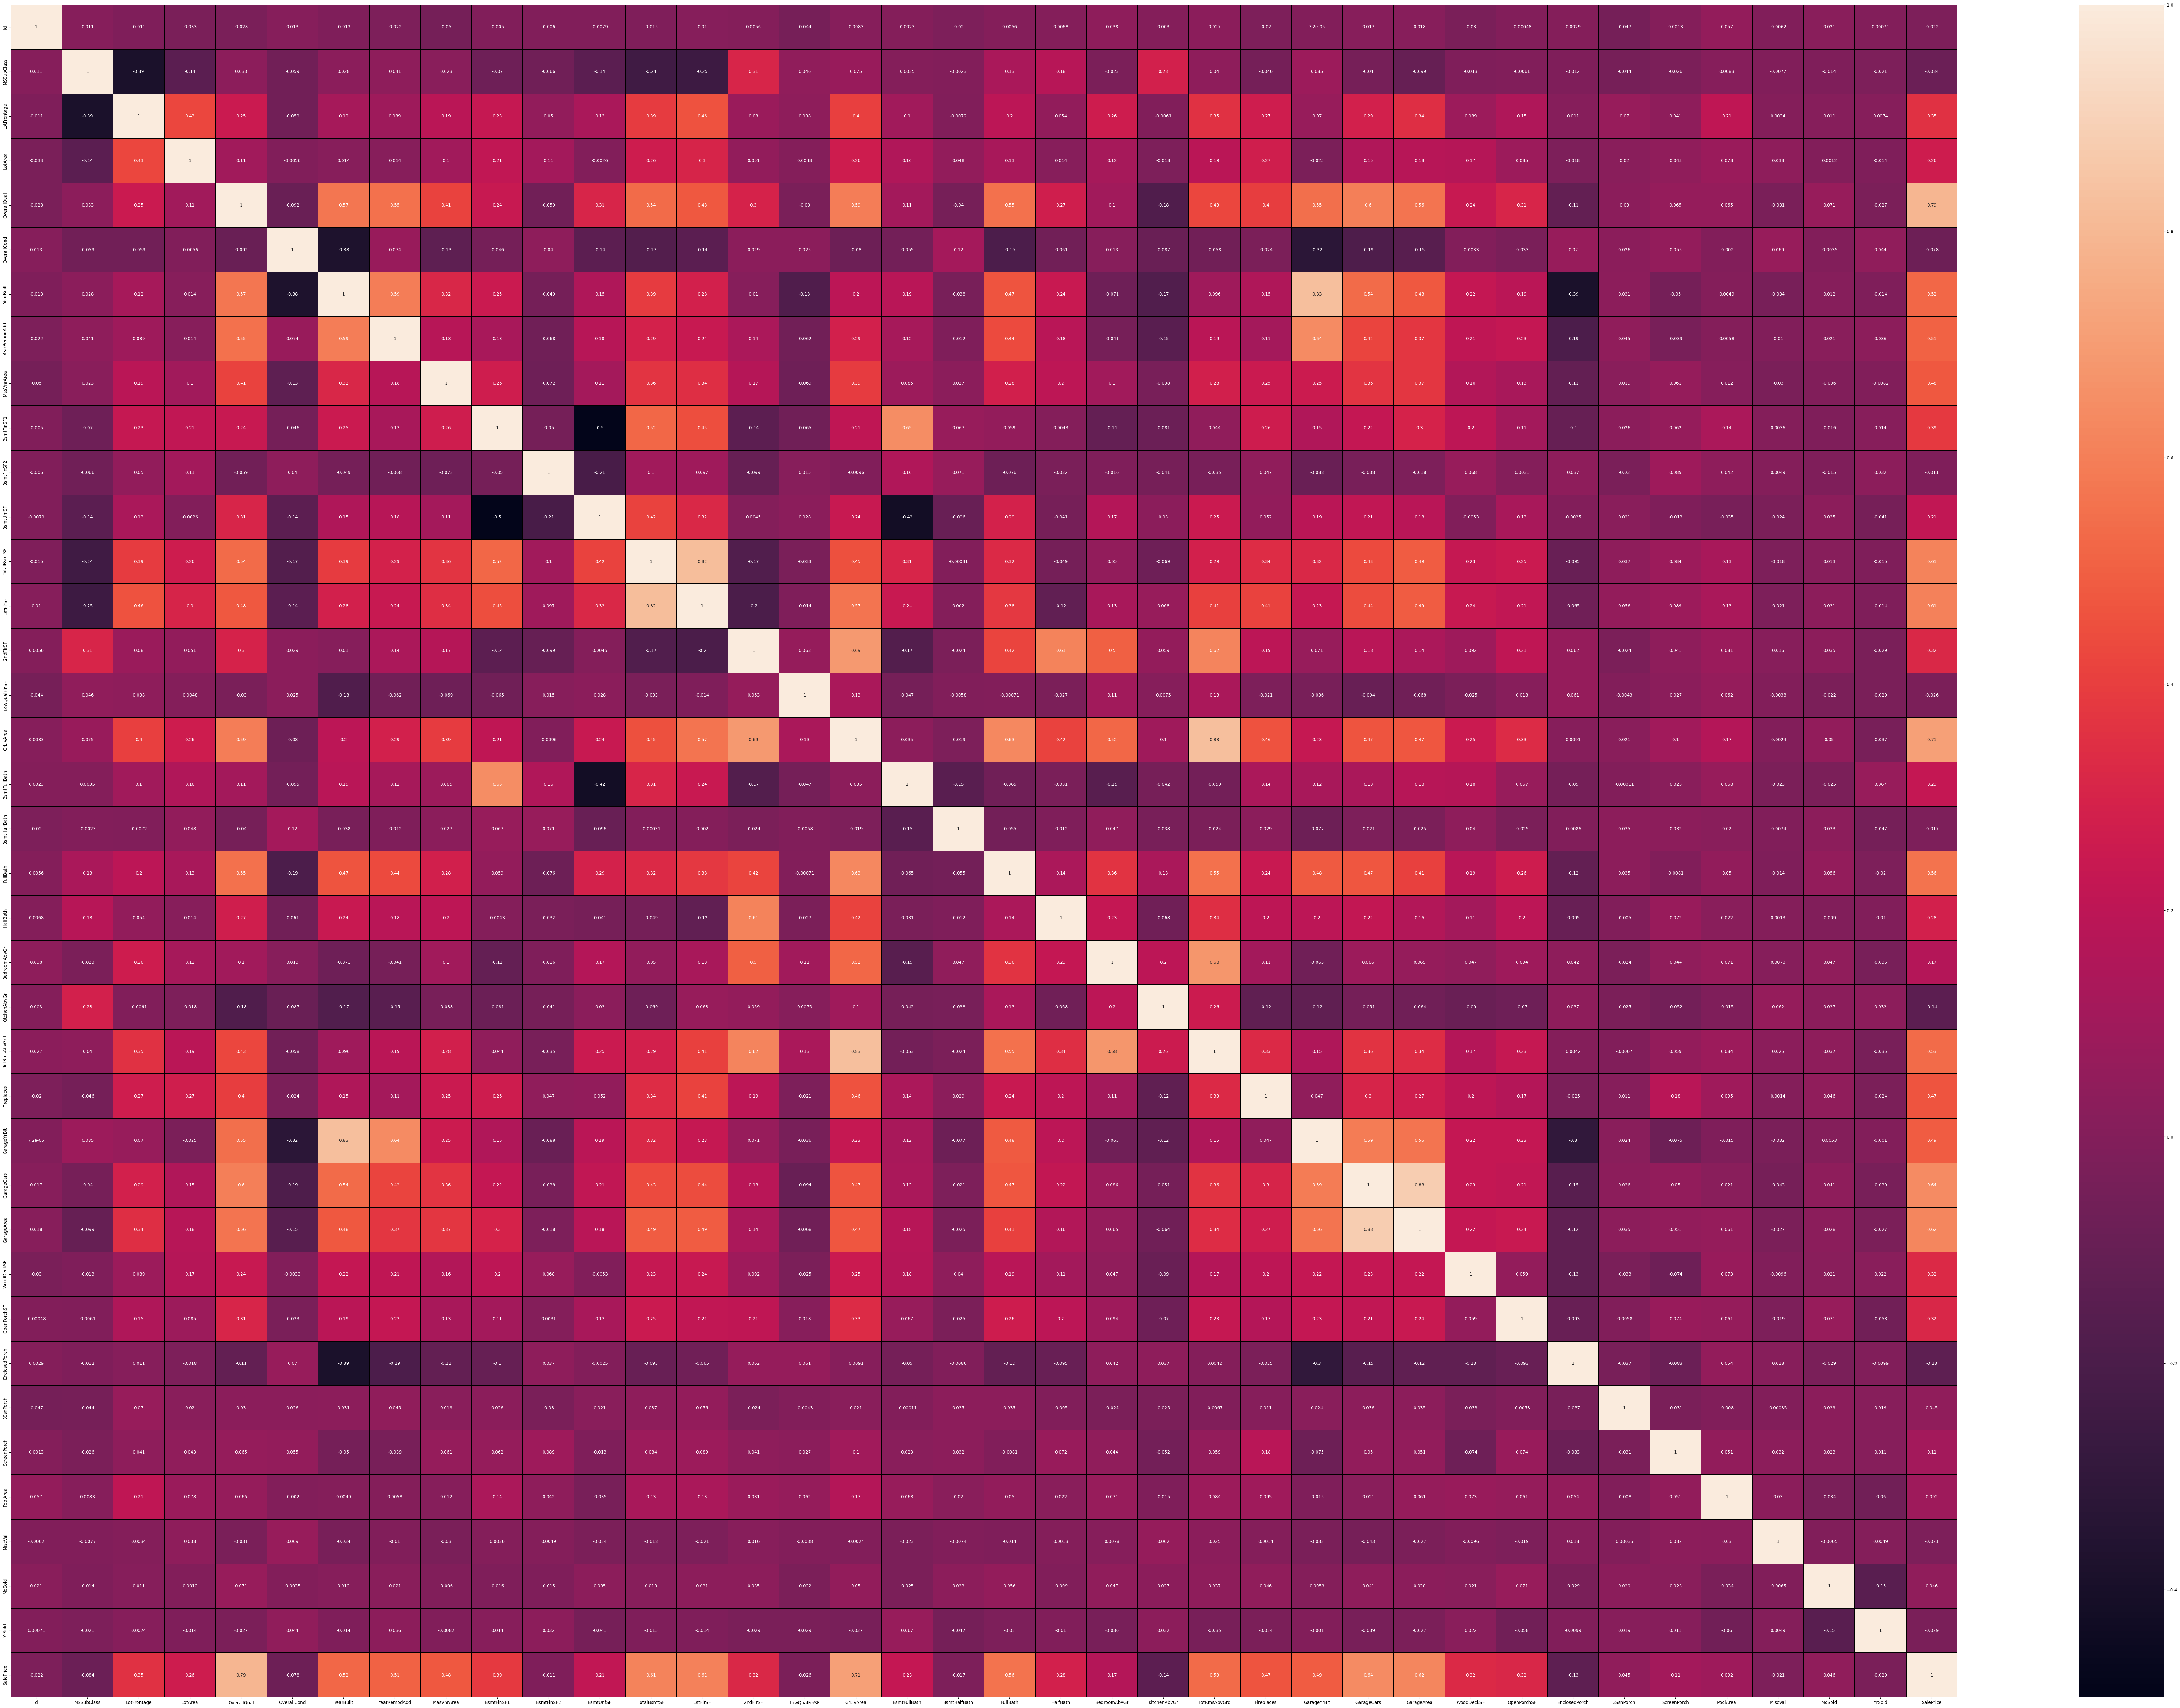

In [16]:
plt.figure(figsize=(100, 70))
sns.heatmap(df_num.corr(), linewidths=.10, linecolor='black', annot=True)
plt.show()

In [17]:
XX = df_num.drop('SalePrice', axis=1)
corr_matrix = XX.corr()

In [18]:
df_num.shape

(1460, 38)

In [19]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.85:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1


In [20]:
df_num.drop(columns=columns_to_drop, axis=1, inplace=True)

In [21]:
df_num.shape

(1460, 37)

In [22]:
df_cat = df.select_dtypes(include = ['object'])
df_cat['Id'] = df.Id
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,1
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,4
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,5


In [23]:
df_cat.shape

(1460, 38)

In [24]:
df_cat1 = df_cat
df_num1 = df_num

In [25]:
df_cat1 = df_cat1.merge(df_num1, how='right')

In [26]:
df = df_cat1

<Axes: >

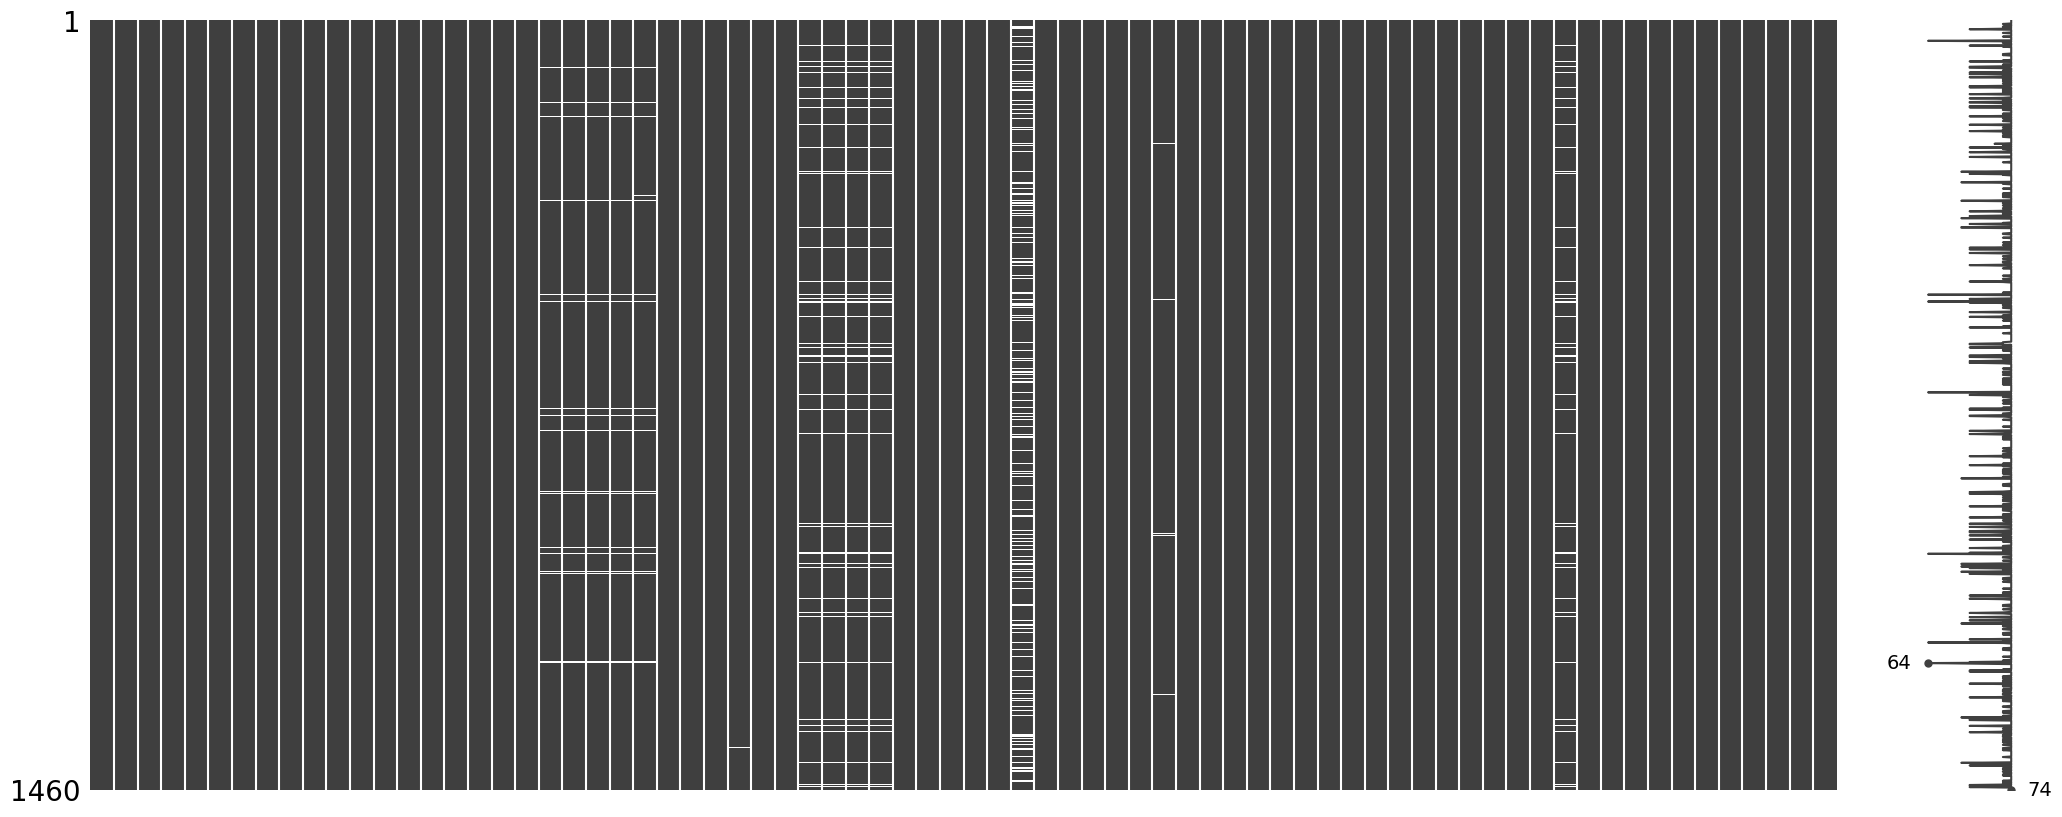

In [27]:
msno.matrix(df)

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
null_numerical_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
imputer.fit(df[null_numerical_columns])
df[null_numerical_columns] = imputer.transform(df[null_numerical_columns])

In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
null_catagorical_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
imputer.fit(df[null_catagorical_columns])
df[null_catagorical_columns] = imputer.transform(df[null_catagorical_columns])

In [30]:
df.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF

In [31]:
X.dtypes

NameError: name 'X' is not defined

In [34]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [35]:
X = pd.concat([
        X.select_dtypes([], ['object']),
        X.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)

In [36]:
X1 = X.drop(['MiscVal', 'Utilities', 'Street'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, train_size=0.75)

In [182]:
from sklearn.metrics import root_mean_squared_error
rand_xgb_param_grid = {
    'max_depth': range(1, 20),
    'min_child_weights': range(1, 20),
    'n_estimators': [100, 200, 300, 10, 250],
    'model__learning_rate': [0.05, 0.1, 0.20, 0.01, 0.15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model = XGBRegressor(enable_categorical=True)
rand_grid_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=rand_xgb_param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

rand_grid_search_xgb.fit(X_train, y_train)

print('Best params :', rand_grid_search_xgb.best_params_)
print('CrossVal score :', cross_val_score(rand_grid_search_xgb.best_estimator_, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1).mean())

y_pred = rand_grid_search_xgb.best_estimator_.predict(X_test)

print('RMSE :', root_mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:36:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_weights", "model__learning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


Best params : {'subsample': 1.0, 'n_estimators': 100, 'model__learning_rate': 0.01, 'min_child_weights': 5, 'max_depth': 7, 'colsample_bytree': 0.8}
CrossVal score : -26679.89047137124
RMSE : 27026.816558884784


In [183]:
rs_df = pd.DataFrame(rand_grid_search_xgb.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'split3_test_score',
            'split4_test_score'
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_subsample,param_n_estimators,param_model__learning_rate,param_min_child_weights,param_max_depth,param_colsample_bytree,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,1.0,100,0.01,5,7,0.8,-27459.282724,-29732.627101,-28983.782474,1
1,0.8,100,0.20,8,9,0.8,-30509.073830,-29423.914540,-29504.894539,2
2,0.8,250,0.20,3,12,1.0,-28946.119047,-30216.908202,-30141.923141,3
3,0.8,10,0.01,4,5,1.0,-29984.302327,-30554.982989,-30295.181601,4
4,1.0,200,0.15,16,6,1.0,-28860.373775,-32206.807297,-30408.271284,5
5,1.0,300,0.05,3,13,0.8,-27994.965419,-29430.806392,-30428.911865,6
6,0.8,250,0.10,19,18,1.0,-28255.281139,-30914.374497,-30570.852027,7
7,1.0,200,0.15,1,18,0.8,-29690.913122,-30203.457969,-30755.613479,8
8,1.0,250,0.01,14,17,0.8,-29197.240936,-30539.622141,-30857.709430,9
9,1.0,250,0.20,1,17,1.0,-27770.648489,-34874.768572,-32904.495476,10


In [249]:
from sklearn.metrics import root_mean_squared_error
xgb_ param_grid = {
    'max_depth': range(2, 7),
    'n_estimators': [100, 250, 200],
    'subsample': [0.8, 1.0],
    'learning_rate': [0.05, 0.1, 0.2],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model = XGBRegressor(enable_categorical=True, objective='reg:squarederror')
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

print('Best params :', grid_search_xgb.best_params_)
print('Best acc :', grid_search_xgb.best_score_)
print('CrossVal score :', cross_val_score(grid_search_xgb.best_estimator_, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1).mean())

y_pred = grid_search_xgb.best_estimator_.predict(X_test)

print('RMSE :', root_mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250, 'subsample': 0.8}
Best acc : -25923.321446995466
CrossVal score : -24570.107086907934
RMSE : 27785.046635427276


In [251]:
best_params = grid_search_xgb.best_params_
best_model = XGBRegressor(objective='reg:squarederror', **best_params, enable_categorical=True)
best_model.fit(X1, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [253]:
pd.DataFrame({'features': list(X1), 'importance': best_model.feature_importances_}).sort_values('importance', ascending = False)

,features,importance
4,OverallQual,0.302491
49,ExterQual,0.256235
26,GarageCars,0.077714
16,GrLivArea,0.034830
64,GarageFinish,0.027945
61,KitchenQual,0.025343
23,TotRmsAbvGrd,0.024287
13,1stFlrSF,0.023014
52,BsmtQual,0.020321
12,TotalBsmtSF,0.018621


In [39]:
categorical_features = X1.select_dtypes(include=['category']).columns.tolist()

In [66]:
from sklearn.metrics import make_scorer, mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
cb_param_grid = {
    'iterations': [250],
    'learning_rate': [0.05, 0.1],
    'depth': [4],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8],
    'rsm': [0.8, 1.0],
    'bagging_temperature': [0, 0.5, 1, 2, 4],
    'random_strength': [0, 1, 5, 10]
}
rmse_scorer = make_scorer(rmse, greater_is_better=False)

cb_model = CatBoostRegressor(cat_features=categorical_features, verbose=0)
cb_grid_search = GridSearchCV(estimator=cb_model, param_grid=cb_param_grid, cv=5, scoring=rmse_scorer, verbose=1, n_jobs=-1)

cb_grid_search.fit(X_train, y_train)

print(f'Best Parameters: {cb_grid_search.best_params_}')
print(f'Best RMSE Score: {-cb_grid_search.best_score_}')

cb_best_model = cb_grid_search.best_estimator_
cb_y_pred = cb_best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, cb_y_pred))
print(f'Test RMSE: {test_rmse}')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KeyboardInterrupt: 

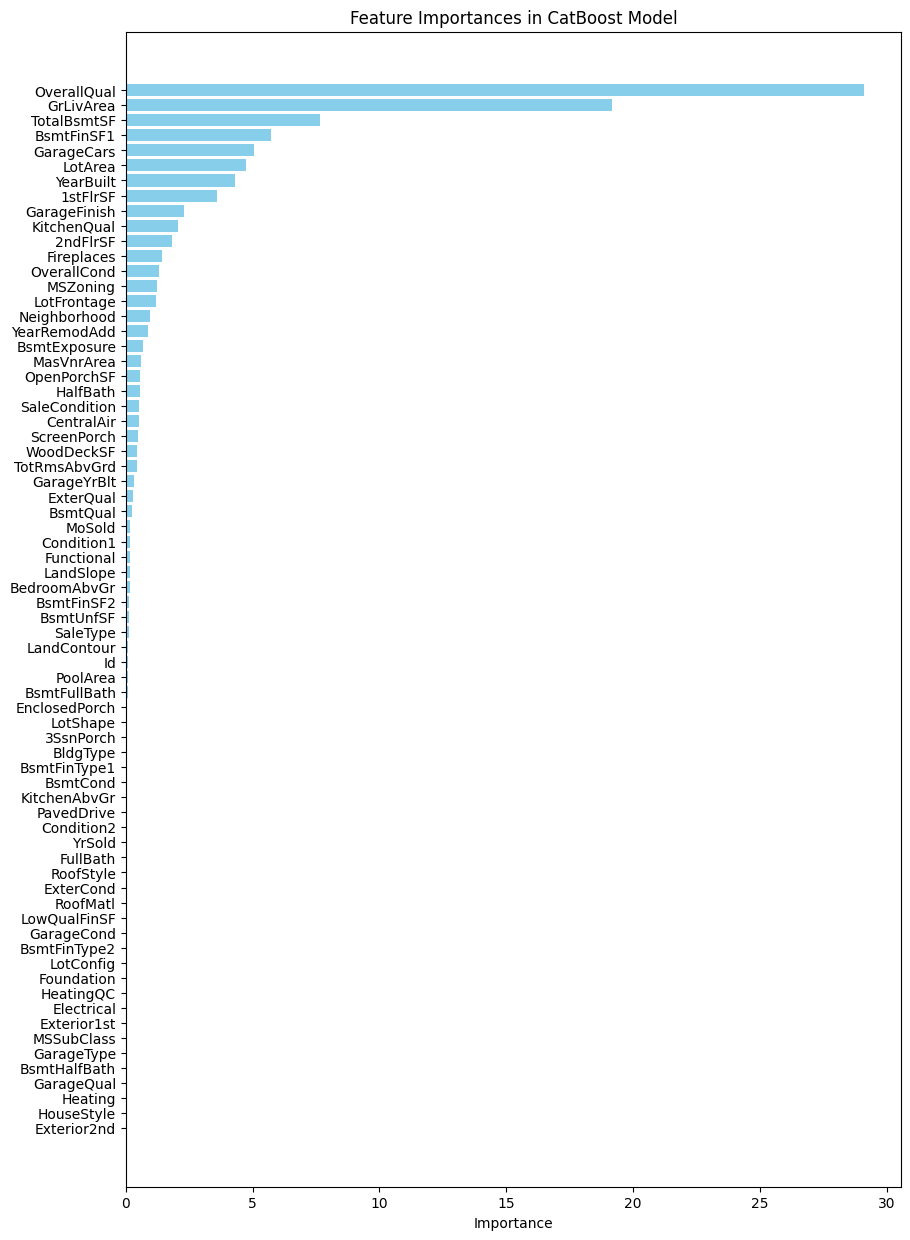

In [46]:
feature_importances = cb_best_model.feature_importances_
features = X1.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

feature_importances = cb_best_model.get_feature_importance()
features = X.columns

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in CatBoost Model')
plt.gca().invert_yaxis()
plt.show()

In [49]:
test1 = pd.concat([
        test.select_dtypes([], ['object']),
        test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)

In [50]:
ids = test1['Id']
test1 = test1.drop(['Alley', 'MasVnrType', 'MiscFeature', 'PoolQC', 'Fence', 'FireplaceQu', 'GarageArea', 'Street', 'Utilities', 'MiscVal'], axis=1)

In [47]:
cb_best_params = cb_grid_search.best_params_

cb_res_model = CatBoostRegressor(**cb_best_params, cat_features=categorical_features)

cb_res_model.fit(X1, y)

0:	learn: 74189.4076476	total: 12.9ms	remaining: 3.2s
1:	learn: 69616.4564596	total: 24ms	remaining: 2.97s
2:	learn: 65481.9097334	total: 36.8ms	remaining: 3.03s
3:	learn: 61792.7619189	total: 47.9ms	remaining: 2.95s
4:	learn: 58386.1036693	total: 59.3ms	remaining: 2.91s
5:	learn: 55503.7072299	total: 70ms	remaining: 2.85s
6:	learn: 52826.6982242	total: 80.7ms	remaining: 2.8s
7:	learn: 50368.9841483	total: 91.8ms	remaining: 2.77s
8:	learn: 48119.6751562	total: 103ms	remaining: 2.75s
9:	learn: 46127.3764878	total: 114ms	remaining: 2.73s
10:	learn: 44354.5661624	total: 125ms	remaining: 2.71s
11:	learn: 42805.2832828	total: 135ms	remaining: 2.68s
12:	learn: 41378.6355971	total: 145ms	remaining: 2.65s
13:	learn: 39950.9216495	total: 156ms	remaining: 2.63s
14:	learn: 38755.1956736	total: 171ms	remaining: 2.68s
15:	learn: 37635.3827302	total: 186ms	remaining: 2.72s
16:	learn: 36545.1049118	total: 197ms	remaining: 2.69s
17:	learn: 35556.0553247	total: 208ms	remaining: 2.67s
18:	learn: 34627.3

In [ ]:
best_params = grid_search_xgb.best_params_
best_model = XGBRegressor(objective='reg:squarederror', **best_params, enable_categorical=True)
best_model.fit(X, y)

In [57]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
null_numerical_columns = test1.select_dtypes(include=['int64', 'float64']).columns.tolist()
imputer.fit(test1[null_numerical_columns])
test1[null_numerical_columns] = imputer.transform(test1[null_numerical_columns])

In [58]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
null_catagorical_columns = test1.select_dtypes(include=['category', 'object']).columns.tolist()
imputer.fit(test1[null_catagorical_columns])
test1[null_catagorical_columns] = imputer.transform(test1[null_catagorical_columns])

In [59]:
test1.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual    

In [60]:
res_pred = cb_res_model.predict(test1)

In [61]:
output = pd.DataFrame({'Id':ids, 'SalePrice': res_pred})

In [62]:
output.to_csv('xgb_submission.csv', index=False)